In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
merc = pd.read_csv("merc.csv")

In [85]:
merc[merc["engineSize"] >3] # Küçük bir filtreleme denemesi


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
7,S Class,2012,10948,Automatic,107000,Petrol,265,36.7,3.5
...,...,...,...,...,...,...,...,...,...
13002,GLE Class,2018,66974,Automatic,16592,Petrol,145,23.7,5.5
13036,SL CLASS,2000,11750,Automatic,68709,Petrol,270,24.6,3.2
13038,C Class,2020,68995,Automatic,2000,Petrol,145,28.0,4.0
13058,S Class,2015,51990,Automatic,23156,Petrol,555,28.0,5.5


In [86]:
merc.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


c:\Users\borte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


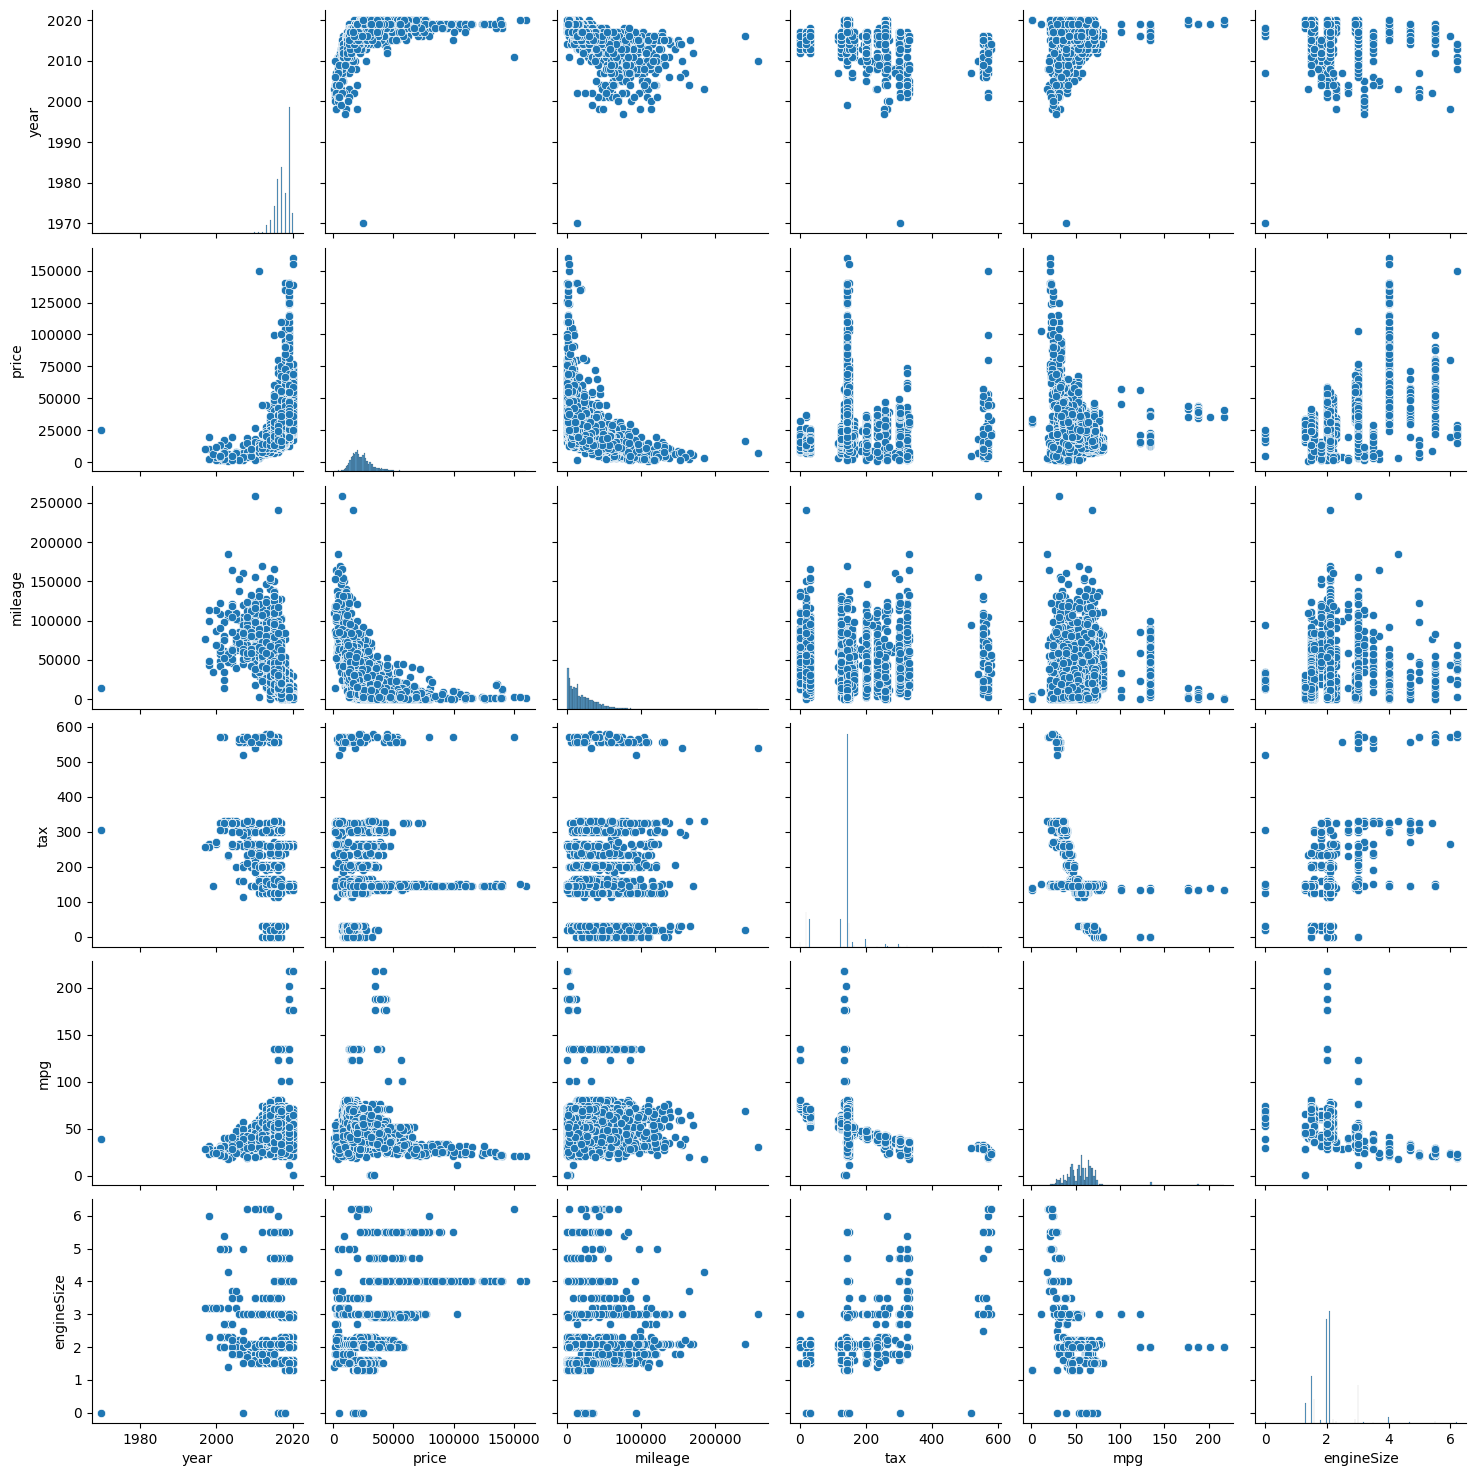

In [87]:
sbn.pairplot(merc)

In [88]:
merc.isnull().sum() # Boş bir vermi var mı ?

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

c:\Users\borte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x500 with 0 Axes>

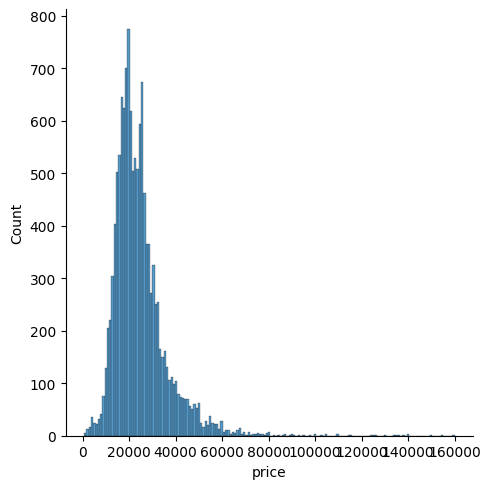

In [89]:
plt.figure(figsize=(7,5))
sbn.displot(merc["price"])

<Axes: xlabel='year', ylabel='count'>

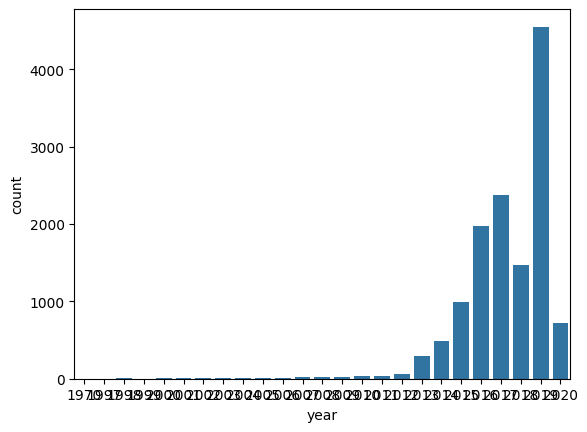

In [90]:
sbn.countplot(x= merc["year"],data=merc)

In [91]:
merc = merc.select_dtypes(exclude="object")
merc.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [92]:
merc.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [93]:
merc.sort_values("price",ascending=False).head(20)

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


In [94]:
len(merc) * 0.01

131.19

In [104]:
merc99 =merc.sort_values("price",ascending=False).iloc[131:] # Veriyi bozabilecek pahalı arabalar veriden çıkarıldı
type(merc99)

pandas.core.frame.DataFrame

c:\Users\borte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


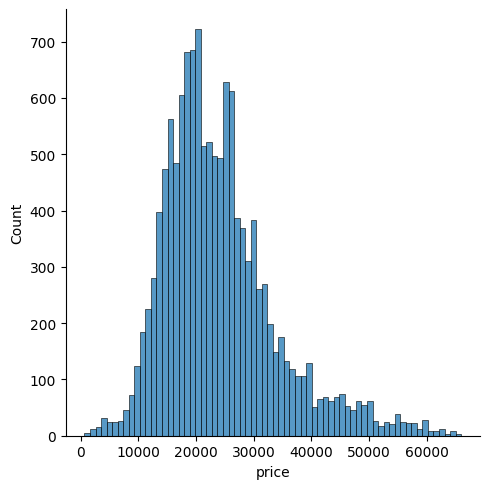

In [105]:
sbn.displot(x="price", data=merc99)

In [111]:
merc.groupby("year").mean()[["price","engineSize"]]

,price,engineSize
year,,
1970,24999.000000,0.000000
1997,9995.000000,3.200000
1998,8605.000000,3.450000
1999,5995.000000,3.200000
2000,5743.333333,3.200000
2001,4957.900000,2.870000
2002,5820.444444,3.522222
2003,4878.000000,3.028571
2004,4727.615385,2.530769


In [120]:
merc[merc["year"]!= 1970].groupby("year").mean()["price"] # 1970 lileri

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [124]:
merc = merc99
merc = merc[merc["year"]!=1970]
merc.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [126]:
merc

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [127]:
y = merc["price"].values
x = merc.drop("price",axis=1).values

In [130]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.33,random_state=33)


In [131]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [132]:
xTrain = scalar.fit_transform(xTrain)

In [133]:
xTest = scalar.fit_transform(xTest)

In [134]:
from keras.models import Sequential
from keras.layers import Dense

In [154]:
model = Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [155]:
model.fit(x=xTrain,y=yTrain,validation_data=[xTest,yTest],batch_size=250,epochs=300)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 660642880.0000 - val_loss: 694210816.0000
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 675050432.0000 - val_loss: 694086272.0000
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 667988544.0000 - val_loss: 693704960.0000
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 659995840.0000 - val_loss: 692687680.0000
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670813120.0000 - val_loss: 690255296.0000
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 663473728.0000 - val_loss: 684980032.0000
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 653874048.0000 - val_loss: 674681984.0000
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 648396864.0000 - val_loss: 655852416.0000
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 624203200.0000 - val_loss: 624013952.0000
Epoch 10/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 590291264.0000 - val_loss: 5747

<Axes: >

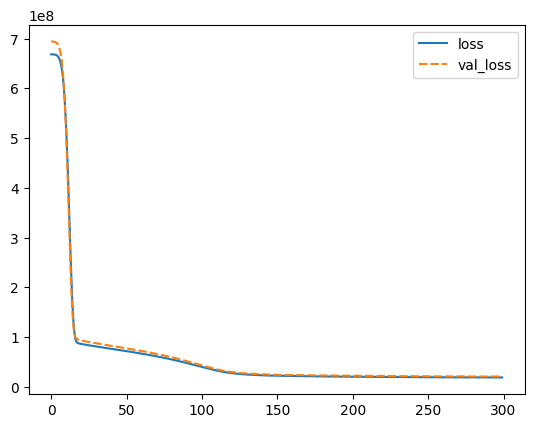

In [156]:
sbn.lineplot(model.history.history)

In [160]:
kayipVeri = pd.DataFrame(model.history.history)

In [161]:
kayipVeri

,loss,val_loss
0,668396096.0,694210816.0
1,668326720.0,694086272.0
2,668100992.0,693704960.0
3,667464640.0,692687680.0
4,665873088.0,690255296.0
...,...,...
295,18951778.0,20790246.0
296,18967746.0,20907664.0
297,18953780.0,20971440.0
298,18946932.0,20729328.0


In [163]:
tahmin =model.predict(xTest)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


In [164]:
from sklearn.metrics import mean_absolute_error

In [165]:
mean_absolute_error(yTest,tahmin) # Gerçekle veri arasındaki fark

3274.607153013119

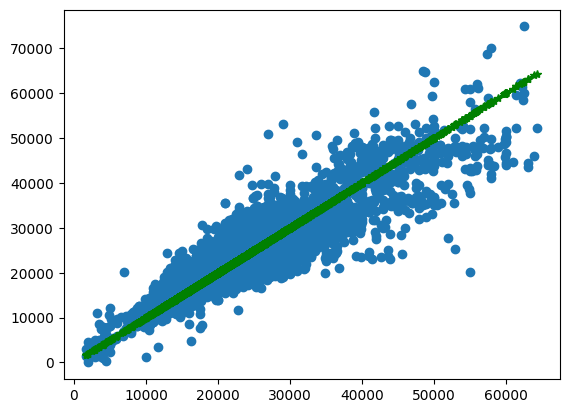

In [171]:
plt.scatter(yTest,tahmin)
plt.plot(yTest,yTest,"g-*")

In [172]:
merc.iloc[2]  # Bunu Deniyelim

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [173]:
yeniArabaSeries =  merc.drop("price",axis=1).iloc[2]

In [176]:
yeniArabaSeries = scalar.transform(yeniArabaSeries.values.reshape(-1,5))

In [177]:
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[62694.008]], dtype=float32)